In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

## Load Symptom Dataset

In [2]:
data = pd.read_csv('./Data/dataset.csv', sep = ',')

In [3]:
data.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Acne,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,malaise,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [4]:
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data['Disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [6]:
len(data['Disease'].unique())

41

## Load Symptom Severity 

In [7]:
severity = pd.read_csv('./Data/Symptom-severity.csv')
severity

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5
...,...,...
126,small_dents_in_nails,2
127,inflammatory_nails,2
128,blister,4
129,red_sore_around_nose,2


In [8]:
len(severity['Symptom'].unique())

131

## Load Exam Mapping

In [9]:
mapeamento = pd.read_csv('./Data/map.csv', sep = ';')

In [10]:
mapeamento.head()

,Disease,Exam1,Exam2,Exam3,Exam4,Exam5,Exam6,Exam7
0,Drug Reaction,Blood tests,Skin biopsy,Patch test,NaN,NaN,NaN,NaN
1,Malaria,Blood tests,Complete blood count (CBC),Polymerase chain reaction (PCR),NaN,NaN,NaN,NaN
2,Allergy,Skin Prick Test (SPT),Intradermal Skin Test,Blood tests,Physicial examination,NaN,NaN,NaN
3,Hypothyroidism,TSH test,T4 test,Thyroid scan,Thyroid ultrasound,NaN,NaN,NaN
4,Psoriasis,Skin biopsy,Physical examination,NaN,NaN,NaN,NaN,NaN


In [11]:
mapeamento.describe()

,Disease,Exam1,Exam2,Exam3,Exam4,Exam5,Exam6,Exam7
count,41,36,34,31,26,17,10,2
unique,41,21,29,27,20,17,9,2
top,Dimorphic hemmorhoids(piles),Physical Examination,Blood tests,Blood tests,Blood tests,Flexible sigmoidoscopy,Sputum test,Cardiac MRI
freq,1,7,4,3,6,1,2,1


# Pré processamento do dataset

### One-hot encoding of Symptoms + Mapping the severity of the symptoms

In [12]:
#Obter coluna dos sintomas  
symptomsCols = pd.unique(data.drop('Disease',1).values.flatten())
onlySymptomsCols=[]
for elem in (symptomsCols[symptomsCols==symptomsCols]):
    onlySymptomsCols.append(elem.replace(' ',''))

weightsFromSymptom = dict()

indexing = severity.to_dict()['Symptom']
weights = severity.to_dict()['weight']
for elem in indexing:
    weightsFromSymptom[indexing[elem].replace(' ','')]=weights[elem]

for elem in onlySymptomsCols:
    if(elem.replace(' ', '') not in indexing.values()):
        weightsFromSymptom[elem.replace(' ','')]=1

symptomsCols = np.insert(onlySymptomsCols, 0, 'Disease')
symptomsCols

dataf = []
for elem in data.values:
    line=[]
    line.append(elem[0])
    elemlist=[]
    oldline = elem.tolist()
    for e in (oldline):
        if(e==e):
            elemlist.append(e.replace(' ', ''))
    del elemlist[0]
    for symptom in onlySymptomsCols:
        if(elemlist.count(symptom)>0):
            weight = weightsFromSymptom[symptom.replace(' ','')]
            line.append(weight)
        else:
            line.append(0)
    dataf.append(line)

processedDataf = pd.DataFrame(data=dataf, columns=symptomsCols)
processedDataf.to_csv("./Data/processed.csv", index=False )
processedDataf

,Disease,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,...,bladder_discomfort,foul_smell_ofurine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,Fungal infection,1,3,4,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,3,4,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,0,4,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,Acne,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4917,Urinary tract infection,0,0,0,0,0,0,0,0,0,...,4,5,6,0,0,0,0,0,0,0
4918,Psoriasis,0,3,0,0,0,0,0,0,0,...,0,0,0,3,2,2,2,0,0,0


### One-hot encoding of exams and diseases

In [13]:
mapeamentoCols = pd.unique(mapeamento.drop('Disease',1).values.flatten())

onlyTestCols=[]
onlyTestCols = mapeamentoCols[mapeamentoCols==mapeamentoCols]
dfCols = np.insert(onlyTestCols, 0, 'Disease')

dfValues = []
for elem in mapeamento.values:
    line=[]
    line.append(elem[0])
    elemlist= elem.tolist()
    del elemlist[0]
    for test in onlyTestCols:
        if(elemlist.count(test)>0):
            line.append(1)
        else:
            line.append(0)
    dfValues.append(line)

testsDf = pd.DataFrame(data=dfValues, columns=dfCols)
testsDf.to_csv("./Data/mapProcessed.csv", index=False)

testsDf

,Disease,Blood tests,Skin biopsy,Patch test,Complete blood count (CBC),Polymerase chain reaction (PCR),Skin Prick Test (SPT),Intradermal Skin Test,Physicial examination,TSH test,...,Pulse oximetry,Anti-cyclic citrullinated peptide (anti-CCP),Erythrocyte sedimentation rate (ESR),C-reactive protein (CRP),Antinuclear antibody (ANA),HLA-B27,Stool culture,Antigen Tests,Mantoux tuberculin skin test,MRI scan
0,Drug Reaction,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Malaria,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Allergy,1,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Hypothyroidism,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Psoriasis,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,GERD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Chronic cholestasis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,hepatitis A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Osteoarthristis,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Dataframe with all Symptons + Exams associated with a Disease

In [14]:
finalDfCols= np.concatenate([onlyTestCols,onlySymptomsCols])


dfValues = []
for elem in processedDataf.values:
    for testLine in testsDf.values:
        if(testLine[0]==elem[0]):
            line= np.concatenate([testLine[1:], elem[1:]])
            dfValues.append(line)

finalDf = pd.DataFrame(data=dfValues, columns=finalDfCols)
finalDf.to_csv("./Data/final.csv", index=False)
finalDf

,Blood tests,Skin biopsy,Patch test,Complete blood count (CBC),Polymerase chain reaction (PCR),Skin Prick Test (SPT),Intradermal Skin Test,Physicial examination,TSH test,T4 test,...,bladder_discomfort,foul_smell_ofurine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4676,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4677,1,0,0,0,0,0,0,0,0,0,...,4,5,6,0,0,0,0,0,0,0
4678,0,1,0,0,0,0,0,0,0,0,...,0,0,0,3,2,2,2,0,0,0


In [15]:
print(len(severity['Symptom']))
#print(severity['Symptom'].duplicated(keep=False))

#print(severity['Symptom'].tolist())

for elem in (severity['Symptom'].tolist()) :
        if(elem  not in onlySymptomsCols  ):
            print(elem)

131


In [16]:
#DataSplit
symptomCount = len(onlySymptomsCols)
testCount = len(onlyTestCols)
print(symptomCount)

[train,test] = train_test_split(finalDf)


trainX=train.iloc[:,testCount:]
trainY=train.iloc[:,:testCount]

testX=test.iloc[:,testCount:]
testY=test.iloc[:,:testCount]


131


In [33]:
model = Sequential()
model.add(Dense(512, input_shape=(symptomCount,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))
#Inner
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Dense(testCount))
model.add(Activation('softmax'))
# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               67584     
_________________________________________________________________
activation_6 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_7 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 103)              

In [34]:
##TRAIN
history = model.fit(
              trainX,
              trainY,
              epochs=8,
              batch_size=2,
              verbose=1, validation_data=(testX,testY)
)

Epoch 1/8
1755/1755 [==============================] - 10s 5ms/step - loss: 132031.6441 - accuracy: 0.3713 - val_loss: 1166965.0000 - val_accuracy: 0.6043
Epoch 2/8
1755/1755 [==============================] - 10s 5ms/step - loss: 1777934.0853 - accuracy: 0.2245 - val_loss: 3264732.0000 - val_accuracy: 0.6043
Epoch 3/8
1755/1755 [==============================] - 10s 5ms/step - loss: 4608106.7840 - accuracy: 0.2215 - val_loss: 6208980.0000 - val_accuracy: 0.0299
Epoch 4/8
1755/1755 [==============================] - 9s 5ms/step - loss: 7899729.4099 - accuracy: 0.2330 - val_loss: 9636111.0000 - val_accuracy: 0.6043
Epoch 5/8
1755/1755 [==============================] - 9s 5ms/step - loss: 12819908.8198 - accuracy: 0.2539 - val_loss: 16745740.0000 - val_accuracy: 0.0444
Epoch 6/8
1755/1755 [==============================] - 9s 5ms/step - loss: 17235781.3636 - accuracy: 0.2704 - val_loss: 18758164.0000 - val_accuracy: 0.6043
Epoch 7/8
1755/1755 [==============================] - 10s 5ms/s

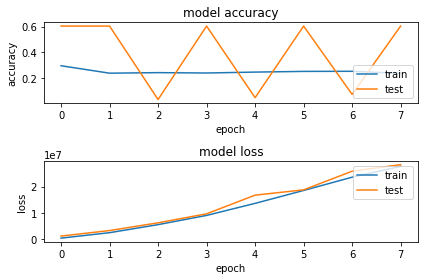

In [35]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [20]:
print(tf.version)
print(tf.executing_eagerly())

<module 'tensorflow._api.v2.version' from '/root/anaconda3/envs/lei/lib/python3.6/site-packages/tensorflow/_api/v2/version/__init__.py'>
True


In [73]:
# Load trained model and evaluate with test dataset
mnist_model = model
loss_and_metrics = mnist_model.evaluate(testX, testY, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

# Do a more deep evaluation
print(testX.to_numpy())
print(testX.to_numpy().shape)
print(testX.shape)
print(type(testX.to_numpy()))

# load the model and create predictions on the test set
predicted_classes = mnist_model.predict(testX.to_numpy()) #mnist_model.predict_class provides the int decoded value
#print(predicted_classes)
# see which we predicted correctly and which not
correctByLine=[];
for i in range(len(testY)):
    matches = predicted_classes[i]==testY.to_numpy()[i]
    correctByLine.append(len(matches[matches==True])/len(matches))

#print(correctByLine)
correct_indices = np.nonzero([x for x in correctByLine if x>0.8])[0]
print(len(correct_indices)," classified 80% correctly")
correct_indices = np.nonzero([x for x in correctByLine if x>0.9])[0]
print(len(correct_indices)," classified 90% correctly")
correct_indices = np.nonzero([x for x in correctByLine if x>0.99])[0]
print(len(correct_indices)," classified 99% correctly")

correct_indices = np.nonzero([x for x in correctByLine if x==1])[0]
print(len(correct_indices)," classified 100% correctly")

incorrect_indices = np.nonzero([x for x in correctByLine if x!=1])[0]

print(len(incorrect_indices)," classified incorrectly (Not 100%)")
print("ACTUAL HARD ACCURACY :" +str(100*len(correct_indices)/len(predicted_classes))+"%")

37/37 - 0s - loss: 28348640.0000 - accuracy: 0.6043
Test Loss 28348640.0
Test Accuracy 0.6042734980583191
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(1170, 131)
(1170, 131)
<class 'numpy.ndarray'>
1170  classified 80% correctly
1170  classified 90% correctly
260  classified 99% correctly
38  classified 100% correctly
1132  classified incorrectly (Not 100%)
ACTUAL HARD ACCURACY :3.247863247863248%
